<a href="https://colab.research.google.com/github/LAIBA-FATIMA-25/Machine-Learning-Labs/blob/main/Lab_7_regression_model_for_laptop_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import a csv file and related packages and perform precosesing steps

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Load the CSV file into a pandas **DataFrame**

In [ ]:
df = pd.read_csv("/content/laptop_data_cleaned.csv")

Data preprocessing steps

# 1. Handling missing values
# Option 1: Remove rows with missing values
# df.dropna(inplace=True)
# Option 2: Impute missing values (e.g., with the mean or median)


In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [ ]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [ ]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [ ]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [ ]:
df.isnull()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,False,False,False,False,False,False,False,False,False,False,False,False,False
1269,False,False,False,False,False,False,False,False,False,False,False,False,False
1270,False,False,False,False,False,False,False,False,False,False,False,False,False
1271,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

,0
Company,False
TypeName,False
Ram,False
Weight,False
Price,False
TouchScreen,False
Ips,False
Ppi,False
Cpu_brand,False
HDD,False


In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
Cpu_brand,0
HDD,0


In [ ]:
df.shape

(1273, 13)

# Access the 'Company' column using square bracket notation.


In [ ]:
df['Company']
# Access the 'Company' column using square bracket notation.

,Company
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
...,...
1268,Asus
1269,Lenovo
1270,Lenovo
1271,Lenovo


In [ ]:
df.nunique()

,0
Company,19
TypeName,6
Ram,9
Weight,171
Price,791
TouchScreen,2
Ips,2
Ppi,39
Cpu_brand,5
HDD,6


In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
Cpu_brand,0
HDD,0


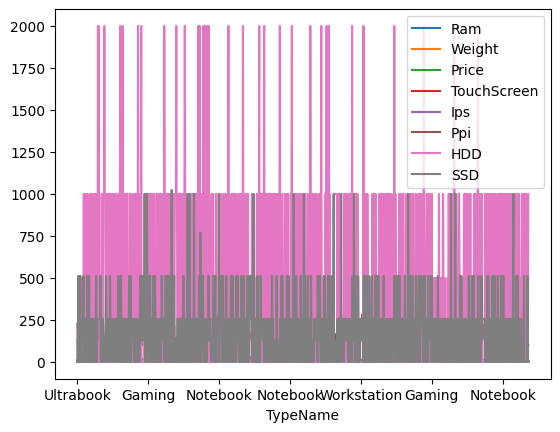

In [ ]:
df.plot('TypeName')
plt.show()

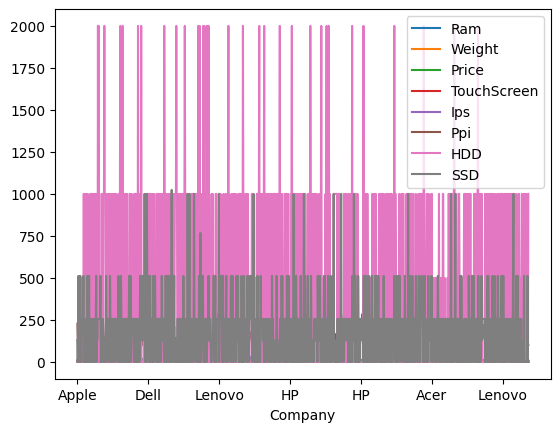

In [ ]:
df.plot('Company')
plt.show()

In [ ]:


# Show basic information about the dataset
df.info(), df.describe(include='all').T, df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


(None,
               count unique            top  freq        mean         std  \
 Company        1273     19           Dell   291         NaN         NaN   
 TypeName       1273      6       Notebook   706         NaN         NaN   
 Ram          1273.0    NaN            NaN   NaN    8.447761    5.098771   
 Weight       1273.0    NaN            NaN   NaN      2.0411    0.669241   
 Price        1273.0    NaN            NaN   NaN   10.828218    0.619565   
 TouchScreen  1273.0    NaN            NaN   NaN    0.146897    0.354142   
 Ips          1273.0    NaN            NaN   NaN    0.279654    0.449006   
 Ppi          1273.0    NaN            NaN   NaN  146.950812   42.926775   
 Cpu_brand      1273      5  Intel Core i7   515         NaN         NaN   
 HDD          1273.0    NaN            NaN   NaN  413.715632  518.054486   
 SSD          1273.0    NaN            NaN   NaN  186.252946  186.531571   
 Gpu_brand      1273      3          Intel   703         NaN         NaN   
 Os  

# One-hot encode categorical features

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], drop_first=True)

# Define features (X) and target (y)

In [ ]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


# Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the linear regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict on test data


In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

R² Score: 0.805
Intercept: 9.65036512825075
Coefficients:
Ram: 0.0255
Weight: 0.0780
TouchScreen: -0.0909
Ips: 0.0476
Ppi: 0.0025
HDD: -0.0000
SSD: 0.0005
Company_Apple: 0.2869
Company_Asus: 0.1029
Company_Chuwi: -0.3790
Company_Dell: 0.1868
Company_Fujitsu: 0.0914
Company_Google: 0.4578
Company_HP: 0.2230
Company_Huawei: 0.0140
Company_LG: 0.4727
Company_Lenovo: 0.1344
Company_MSI: 0.2636
Company_Mediacom: -0.3585
Company_Microsoft: 0.4381
Company_Razer: 0.5931
Company_Samsung: 0.3678
Company_Toshiba: 0.3044
Company_Vero: -0.5593
Company_Xiaomi: -0.2267
TypeName_Gaming: -0.0631
TypeName_Netbook: -0.2192
TypeName_Notebook: -0.2647
TypeName_Ultrabook: 0.0214
TypeName_Workstation: 0.3522
Cpu_brand_Intel Core i3: 0.0891
Cpu_brand_Intel Core i5: 0.3992
Cpu_brand_Intel Core i7: 0.4446
Cpu_brand_Other Intel Processor: -0.1059
Gpu_brand_Intel: 0.0821
Gpu_brand_Nvidia: 0.0979
Os_Others: -0.2608
Os_Windows: -0.0261


# Plot actual vs predicted prices

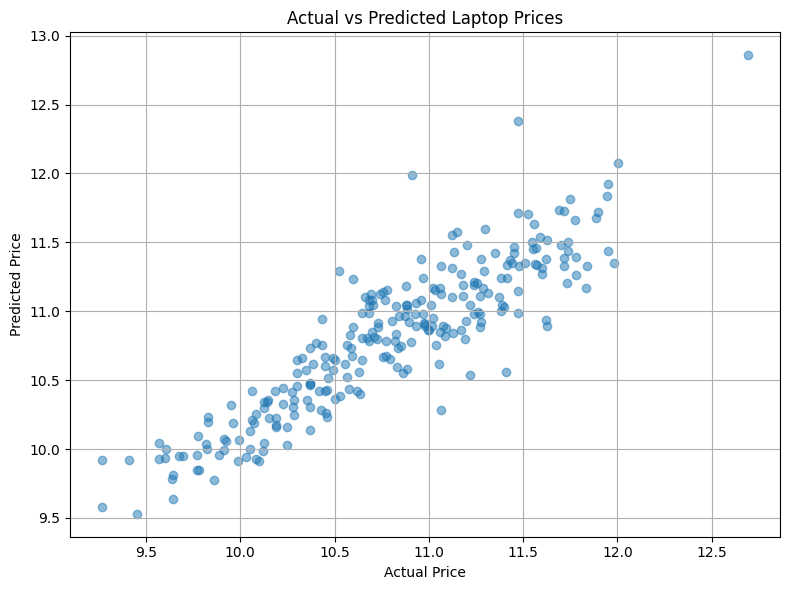

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual vs predicted prices (color-coded)
  Actual prices in blue

 Predicted prices in red

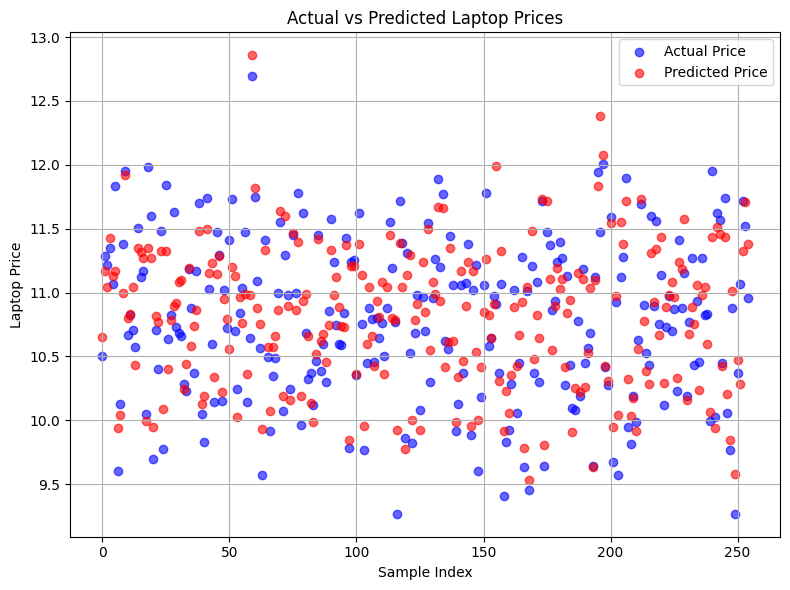

In [ ]:
plt.figure(figsize=(8, 6))


plt.scatter(range(len(y_test)), y_test, label="Actual Price", color='blue', alpha=0.6)


plt.scatter(range(len(y_pred)), y_pred, label="Predicted Price", color='red', alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Laptop Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


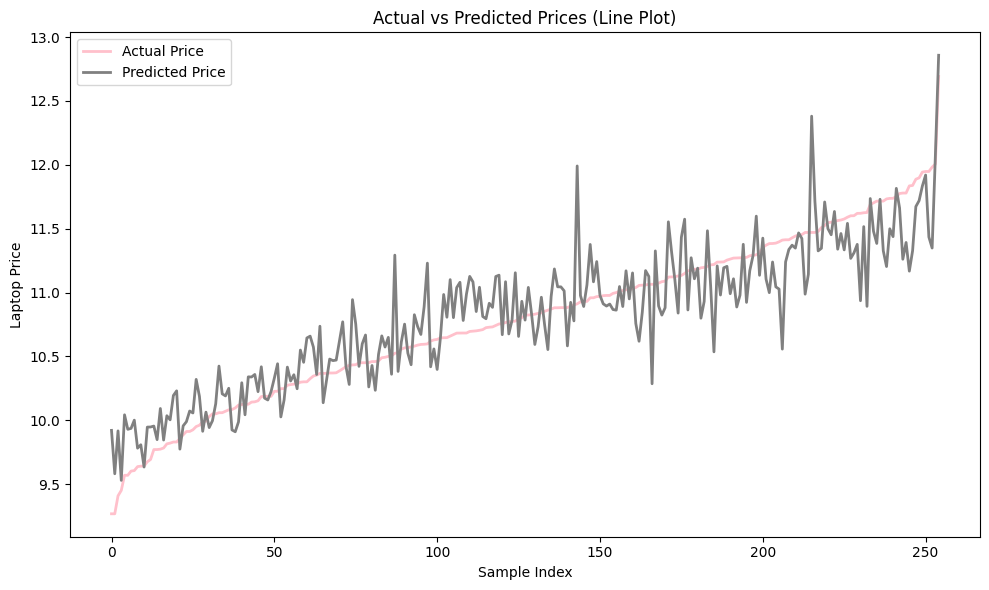

In [ ]:

y_test_sorted = y_test.reset_index(drop=True).sort_values()
y_pred_sorted = pd.Series(y_pred).loc[y_test_sorted.index].reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, color='pink', label='Actual Price', linewidth=2)
plt.plot(y_pred_sorted.values, color='grey', label='Predicted Price', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("Laptop Price")
plt.title("Actual vs Predicted Prices (Line Plot)")
plt.legend()
plt.tight_layout()
plt.show()